In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\RESHMA\Downloads\In class ML SESSION 1\healthcare_dataset -  LMS.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [3]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [4]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(534)

In [9]:
df.drop_duplicates()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [10]:
# to remove duplicate rows:
# df.drop_duplicates()
# df.drop_duplicates(keep='last')
# df.drop_duplicates(keep=False)
# df.drop_duplicates(inplace=True)

In [11]:
df[df["Billing Amount"]<0]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.507813,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,-1018.245371,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,-109.097122,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,-576.727907,369,Urgent,2021-04-17,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,JosEPh cOx,23,Male,AB-,Diabetes,2019-10-13,Peter Smith,Inc Ward,Blue Cross,-353.865186,271,Elective,2019-10-25,Lipitor,Inconclusive
53204,AsHley WaRnER,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
53232,dAnIel dRaKe,68,Female,B+,Hypertension,2020-04-24,Brett Ray,Carr Ltd,Aetna,-591.917419,426,Elective,2020-04-26,Lipitor,Abnormal
54136,DR. micHaEl MckAy,64,Male,O+,Cancer,2019-05-31,Dawn Navarro,"Mcconnell and Rios, Clark",UnitedHealthcare,-199.663795,122,Urgent,2019-06-12,Ibuprofen,Abnormal


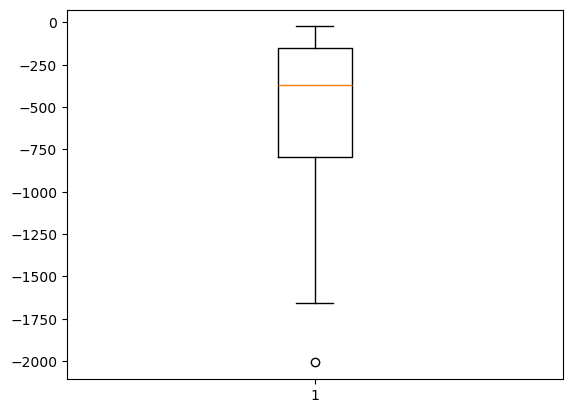

In [12]:
plt.boxplot(df[df["Billing Amount"] < 0]["Billing Amount"])
plt.show()

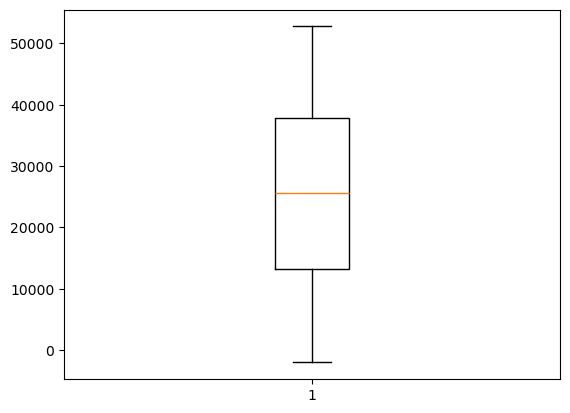

In [13]:
plt.boxplot(df["Billing Amount"])      # to check for outliers boxplot and scatterplot
plt.show()

In [14]:
df_no_neg = df[df["Billing Amount"] >= 0]  
df=df_no_neg["Billing Amount"].mean()

In [15]:
df_no_neg

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [28]:
print(df["Billing Amount"].dtype)

float64


In [18]:
print(df[df["Billing Amount"] < 0].shape[0])

108


In [20]:
df_no_neg["Billing Amount"].mean()

np.float64(25590.084631885362)

In [21]:
df.loc[df["Billing Amount"]<0,"Billing Amount"] = df_no_neg["Billing Amount"].mean()

In [22]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25590.084632,301.134829
std,19.602454,14164.855105,115.243069
min,13.000000,9.238787,101.000000
25%,35.000000,13324.875526,202.000000
50%,52.000000,25590.084632,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [23]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        49905
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [24]:
df.drop(columns=["Name","Hospital","Doctor","Room Number"],inplace = True)

In [25]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')

In [27]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 55500 non-null  int64         
 1   Gender              55500 non-null  object        
 2   Blood Type          55500 non-null  object        
 3   Medical Condition   55500 non-null  object        
 4   Date of Admission   55500 non-null  datetime64[ns]
 5   Insurance Provider  55500 non-null  object        
 6   Billing Amount      55500 non-null  float64       
 7   Admission Type      55500 non-null  object        
 8   Discharge Date      55500 non-null  object        
 9   Medication          55500 non-null  object        
 10  Test Results        55500 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 4.7+ MB


In [30]:
df["year"] = df["Date of Admission"].dt.year
df["month"] = df["Date of Admission"].dt.month_name()
df["weekday"] = df["Date of Admission"].dt.day_name()
df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,year,month,weekday
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,2024,January,Wednesday
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,2019,August,Tuesday
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,2022,September,Thursday
3,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,2020,November,Wednesday
4,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,2022,September,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Blue Cross,2650.714952,Elective,2020-09-15,Penicillin,Abnormal,2020,August,Sunday
55496,61,Female,AB-,Obesity,2020-01-23,Cigna,31457.797307,Elective,2020-02-01,Aspirin,Normal,2020,January,Thursday
55497,38,Female,B+,Hypertension,2020-07-13,UnitedHealthcare,27620.764717,Urgent,2020-08-10,Ibuprofen,Abnormal,2020,July,Monday
55498,43,Male,O-,Arthritis,2019-05-25,Medicare,32451.092358,Elective,2019-05-31,Ibuprofen,Abnormal,2019,May,Saturday


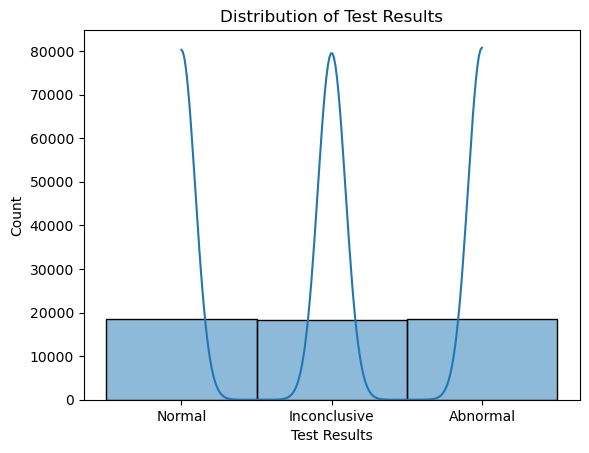

In [31]:
# target distribution

sns.histplot(df["Test Results"], kde=True)
plt.title("Distribution of Test Results")
plt.show()

In [32]:
# INFERENCES
# The counts appear roughly balanced across the three categories
# No extreme class imbalance is visible

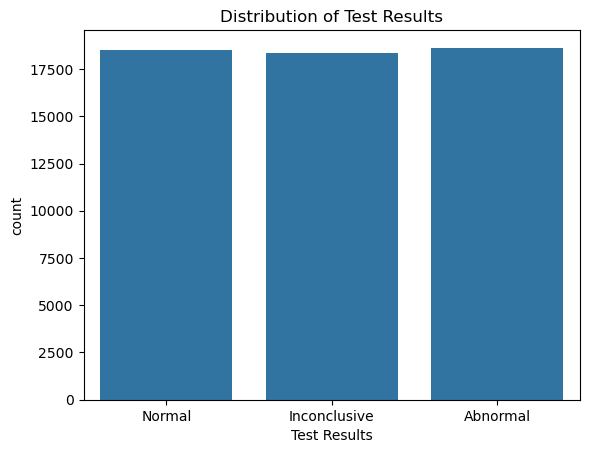

In [33]:
sns.countplot(x="Test Results", data=df)
plt.title("Distribution of Test Results")
plt.show()                                                  # suitable for classification modeling


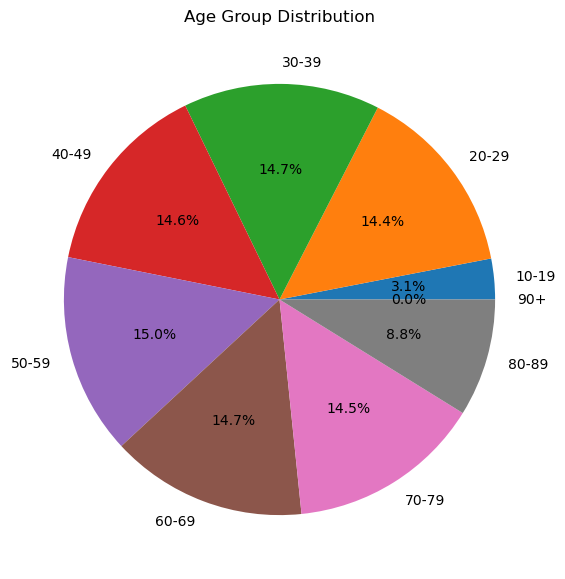

In [34]:
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[10,19,29,39,49,59,69,79,89,99],
                        labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'])
age_counts = df['AgeGroup'].value_counts().sort_index()
plt.figure(figsize=(7,7))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.show()

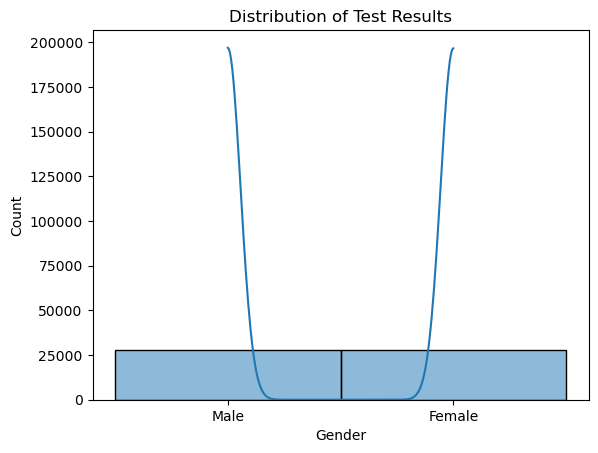

In [35]:
sns.histplot(df["Gender"], kde=True)
plt.title("Distribution of Test Results")
plt.show()

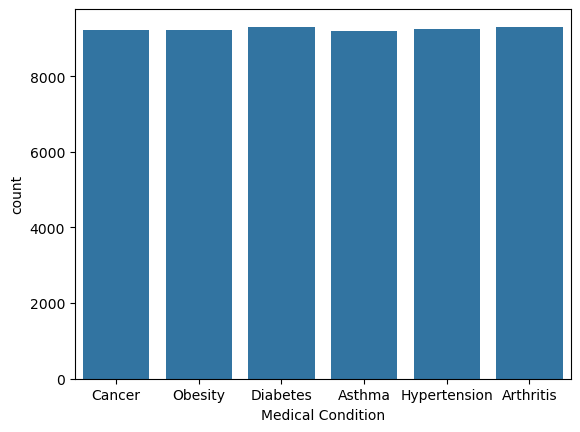

In [36]:
#Top medical conditions
sns.countplot(x="Medical Condition", data=df)
plt.show()

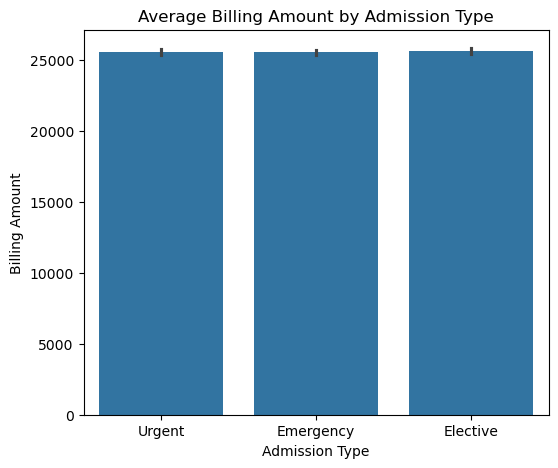

In [37]:
plt.figure(figsize=(6,5))
sns.barplot(x="Admission Type", y="Billing Amount", data=df)
plt.title("Average Billing Amount by Admission Type")
plt.show()

In [38]:
for col in df.columns:
    print(f"'{col}'")

'Age'
'Gender'
'Blood Type'
'Medical Condition'
'Date of Admission'
'Insurance Provider'
'Billing Amount'
'Admission Type'
'Discharge Date'
'Medication'
'Test Results'
'year'
'month'
'weekday'
'AgeGroup'


In [39]:
# Billing amount by Admission Type 
# count admissions per month

In [40]:
monthly_admissions = df.groupby("month").size()
monthly_admissions

month
April        4518
August       4832
December     4649
February     4255
January      4692
July         4812
June         4699
March        4672
May          4599
November     4548
October      4678
September    4546
dtype: int64

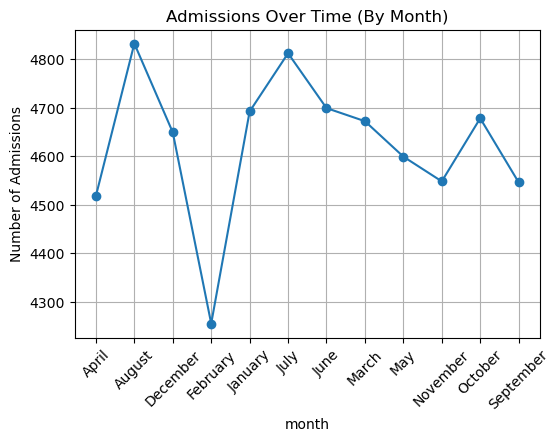

In [41]:
# line plot
plt.figure(figsize=(6,4))
plt.plot(monthly_admissions.index,
         monthly_admissions.values,
         marker='o')
plt.xlabel("month")
plt.ylabel("Number of Admissions")
plt.title("Admissions Over Time (By Month)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [42]:
#Insurance Provider vs Test Results (top 6 providers)

top_providers = df["Insurance Provider"].value_counts().head(7).index
top_providers

Index(['Cigna', 'Medicare', 'UnitedHealthcare', 'Blue Cross', 'Aetna'], dtype='object', name='Insurance Provider')

In [43]:
#filtering
data_top=df[df["Insurance Provider"].isin(top_providers)]
data_top

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,year,month,weekday,AgeGroup
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,2024,January,Wednesday,30-39
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,2019,August,Tuesday,60-69
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,2022,September,Thursday,70-79
3,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,2020,November,Wednesday,20-29
4,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,2022,September,Monday,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Blue Cross,2650.714952,Elective,2020-09-15,Penicillin,Abnormal,2020,August,Sunday,40-49
55496,61,Female,AB-,Obesity,2020-01-23,Cigna,31457.797307,Elective,2020-02-01,Aspirin,Normal,2020,January,Thursday,60-69
55497,38,Female,B+,Hypertension,2020-07-13,UnitedHealthcare,27620.764717,Urgent,2020-08-10,Ibuprofen,Abnormal,2020,July,Monday,30-39
55498,43,Male,O-,Arthritis,2019-05-25,Medicare,32451.092358,Elective,2019-05-31,Ibuprofen,Abnormal,2019,May,Saturday,40-49


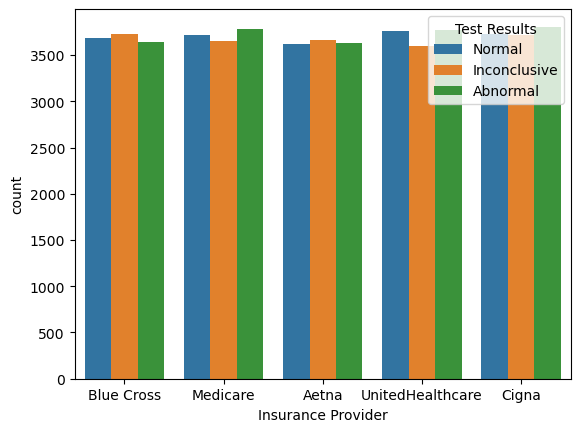

In [43]:
sns.countplot(x=df["Insurance Provider"],hue="Test Results",data=df)
plt.show()

In [44]:
df.drop(columns=["Doctor", "Hospital", "Insurance Provider", "Room Number"],
        inplace=True, errors="ignore")


In [45]:
df = pd.get_dummies(df, drop_first=True)


In [46]:
X = df.drop(columns="Billing Amount")
y = df["Billing Amount"]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)


In [50]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
# train linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [52]:
# predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"R²   : {r2}")


MSE  : 205997043.24889973
RMSE : 14352.597090732384
MAE  : 12300.673641274141
R²   : -0.04016420146745148


In [54]:
# Adjusted R2

n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2


-0.2555500241530444

In [55]:
# check model coefficients

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})

coeff_df.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
2,year,5832.960147
1,Date of Admission,924.375767
1880,month_December,788.511073
1888,month_October,702.378019
1879,month_August,631.605305
...,...,...
1768,Discharge Date_2024-02-23,-730.101748
1599,Discharge Date_2023-09-07,-731.599076
1741,Discharge Date_2024-01-27,-741.834060
1613,Discharge Date_2023-09-21,-744.310776
